**Author:** Lisa Wallner  
**Description:**  In this notebook the evaluation results of the first 50 README files which are generated with the llm *jamba-1.5-mini* and *llama3.1-8b* are analysed. In this evaluation the results of the first and the modified prompt will compared with each other. Keep in mind, the evaluation scores of the orignal README are the same like in df_score_lama because it make no sense the evaluate the same file twice.
 

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
import seaborn as sns
import numpy as np

### Universal Functions

In [18]:
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

## df_llama_q

In [19]:
df_llama_q = load_data('../data/evaluation_results/df_llama_questions.json')
df_llama_q = df_llama_q.loc[0:49]

In [20]:
len(df_llama_q)

50

In [21]:
df_llama_q.head(3)

,id,repo_owner,repo_name,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,4.666667,4.000000,5.000000,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,5.000000,4.333333,5.000000,3.333333,4.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,5.000000,4.333333,4.666667,2.666667,3.333333,4.666667,5.0,4.000000,4.000000,3.666667


In [22]:
df_llama_q.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.606667,4.273333,4.620000,2.786667,3.313333,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.327777,0.354370,0.404117,0.465402,0.548798,0.594800,0.546313,0.508834,0.837987,0.830949
min,3.666667,3.333333,3.333333,2.000000,2.333333,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,4.000000,4.416667,2.333333,3.000000,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.666667,4.333333,4.666667,3.000000,3.333333,5.000000,4.666667,4.666667,3.666667,4.166667
75%,5.000000,4.666667,5.000000,3.000000,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## df_jamba_q

In [23]:
df_jamba_q = load_data('../data/evaluation_results/df_jamba_questions.json')

In [24]:
len(df_jamba_q)

50

In [25]:
df_jamba_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,5.000000,4.333333,4.666667,2.666667,2.666667,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,4.000000,3.666667,3.333333,2.333333,2.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.333333,4.000000,3.000000,2.333333,3.000000,4.666667,5.0,4.000000,4.000000,3.666667


In [26]:
df_jamba_q.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.346667,4.000000,3.746667,2.360000,3.020000,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.609673,0.538748,0.934499,0.554675,0.544650,0.594800,0.546313,0.508834,0.837987,0.830949
min,2.666667,2.666667,2.000000,1.333333,1.666667,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,3.666667,3.083333,2.000000,2.666667,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.333333,4.000000,3.666667,2.333333,3.000000,5.000000,4.666667,4.666667,3.666667,4.166667
75%,4.666667,4.333333,4.666667,2.666667,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,3.666667,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## df_llama_mod_q

In [27]:
df_llama_mod_q = load_data('../data/evaluation_results/df_llama_mod_questions.json')

In [28]:
len(df_llama_mod_q)

50

In [29]:
df_llama_mod_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,4.666667,4.000000,5.0,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,5.000000,4.666667,5.0,3.333333,3.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.666667,4.333333,4.0,2.666667,3.333333,4.666667,5.0,4.000000,4.000000,3.666667


## df_jamba_mod_q

In [30]:
df_jamba_mod_q = load_data('../data/evaluation_results/df_jamba_mod_questions.json')

In [31]:
len(df_jamba_mod_q)

50

In [32]:
df_jamba_mod_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,4.333333,4.333333,4.333333,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,4.333333,4.333333,2.333333,3.333333,2.333333,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.666667,4.666667,5.000000,2.333333,2.666667,4.666667,5.0,4.000000,4.000000,3.666667


## Visualize

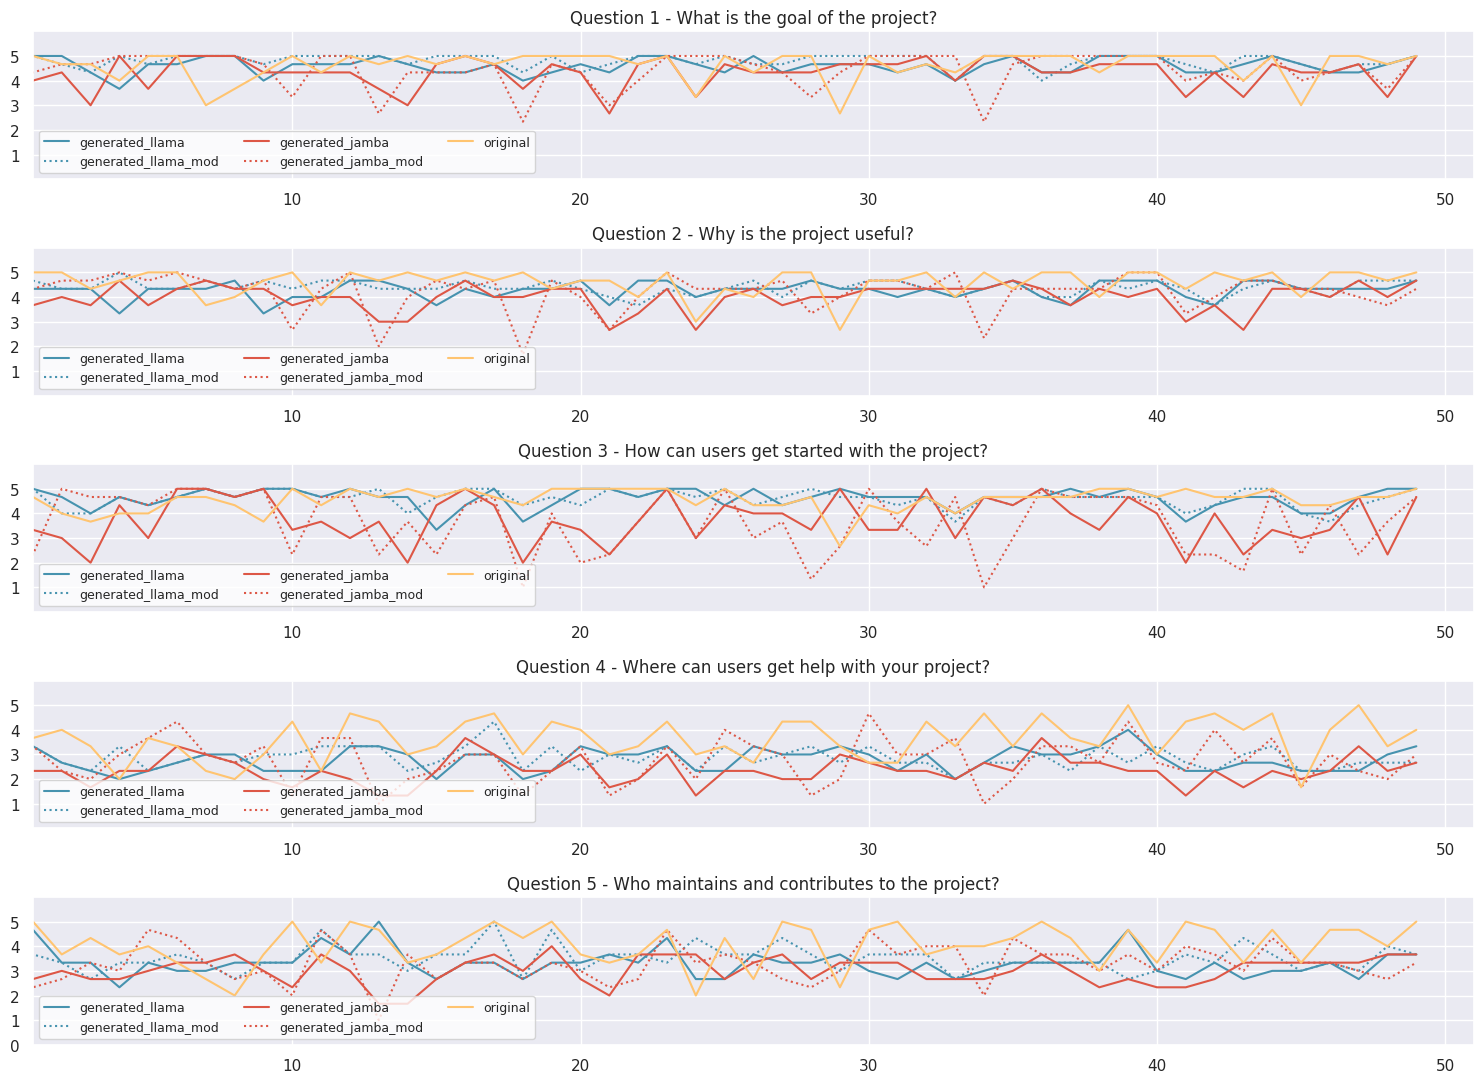

In [49]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot


    # generated llama
    q1_g_l = df_llama_q['score_q1_g_1']
    q2_g_l = df_llama_q['score_q2_g_2']
    q3_g_l = df_llama_q['score_q3_g_3']
    q4_g_l = df_llama_q['score_q4_g_4']
    q5_g_l = df_llama_q['score_q5_g_5']

    # generated jamba
    q1_g_j = df_jamba_q['score_q1_g_1']
    q2_g_j = df_jamba_q['score_q2_g_2']
    q3_g_j = df_jamba_q['score_q3_g_3']
    q4_g_j = df_jamba_q['score_q4_g_4']
    q5_g_j = df_jamba_q['score_q5_g_5']

    # generated llama_mod
    q1_g_l_m = df_llama_mod_q['score_q1_g_1']
    q2_g_l_m = df_llama_mod_q['score_q2_g_2']
    q3_g_l_m = df_llama_mod_q['score_q3_g_3']
    q4_g_l_m = df_llama_mod_q['score_q4_g_4']
    q5_g_l_m = df_llama_mod_q['score_q5_g_5']

    # generated jamba_mod
    q1_g_j_m = df_jamba_mod_q['score_q1_g_1']
    q2_g_j_m = df_jamba_mod_q['score_q2_g_2']
    q3_g_j_m = df_jamba_mod_q['score_q3_g_3']
    q4_g_j_m = df_jamba_mod_q['score_q4_g_4']
    q5_g_j_m = df_jamba_mod_q['score_q5_g_5']
    
    # origignal
    q1_o = df_jamba_mod_q['score_q1_o_1']
    q2_o = df_jamba_mod_q['score_q2_o_2']
    q3_o = df_jamba_mod_q['score_q3_o_3']
    q4_o = df_jamba_mod_q['score_q4_o_4']
    q5_o = df_jamba_mod_q['score_q5_o_5']

    ax[0].plot(q1_g_l, label='generated_llama', color='#4793AF')
    ax[0].plot(q1_g_l_m, label='generated_llama_mod', color='#4793AF', linestyle=':')
    ax[0].plot(q1_g_j, label='generated_jamba', color='#DD5746')
    ax[0].plot(q1_g_j_m, label='generated_jamba_mod', color='#DD5746', linestyle=':')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?')
    ax[0].legend(ncol=3, loc=3, fontsize=9, facecolor='white') 
    ax[0].set_xlim(1,51)
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].set_ylim(0,6)
    ax[0].grid(True) 

    ax[1].plot(q2_g_l, label='generated_llama', color='#4793AF')
    ax[1].plot(q2_g_l_m, label='generated_llama_mod', color='#4793AF', linestyle=':')
    ax[1].plot(q2_g_j, label='generated_jamba', color='#DD5746')
    ax[1].plot(q2_g_j_m, label='generated_jamba_mod', color='#DD5746', linestyle=':')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?')
    ax[1].legend(ncol=3, loc=3, fontsize=9, facecolor='white') 
    ax[1].set_xlim(1,51)
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].set_ylim(0,6)
    ax[1].grid(True) 

    ax[2].plot(q3_g_l, label='generated_llama', color='#4793AF')
    ax[2].plot(q3_g_l_m, label='generated_llama_mod', color='#4793AF', linestyle=':')
    ax[2].plot(q3_g_j, label='generated_jamba', color='#DD5746')
    ax[2].plot(q3_g_j_m, label='generated_jamba_mod', color='#DD5746', linestyle=':')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?')
    ax[2].legend(ncol=3, loc=3, fontsize=9, facecolor='white') 
    ax[2].set_xlim(1,51)
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].set_ylim(0,6)
    ax[2].grid(True) 

    ax[3].plot(q4_g_l, label='generated_llama', color='#4793AF')
    ax[3].plot(q4_g_l_m, label='generated_llama_mod', color='#4793AF', linestyle=':')
    ax[3].plot(q4_g_j, label='generated_jamba', color='#DD5746')
    ax[3].plot(q4_g_j_m, label='generated_jamba_mod', color='#DD5746', linestyle=':')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?')
    ax[3].legend(ncol=3, loc=3, fontsize=9, facecolor='white') 
    ax[3].set_xlim(1,51)
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].set_ylim(0,6)
    ax[3].grid(True) 

    ax[4].plot(q5_g_l, label='generated_llama', color='#4793AF')
    ax[4].plot(q5_g_l_m, label='generated_llama_mod', color='#4793AF', linestyle=':')
    ax[4].plot(q5_g_j, label='generated_jamba', color='#DD5746')
    ax[4].plot(q5_g_j_m, label='generated_jamba_mod', color='#DD5746', linestyle=':')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?')
    ax[4].legend(ncol=3, loc=3, fontsize=9, facecolor='white') 
    ax[4].set_xlim(1,51)
    ax[4].set_yticks([0, 1, 2, 3, 4, 5])
    ax[4].set_ylim(0,6)
    ax[4].grid(True) 

    # plt.grid(visible=True)
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings